# 모델 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Colab Notebooks/HGM/HGML/CH8_CNN'

/content/drive/MyDrive/Colab Notebooks/HGM/HGML/CH8_CNN


In [3]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [4]:
model.layers

In [5]:
conv = model.layers[0]

In [6]:
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [7]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.030566314 0.24347027


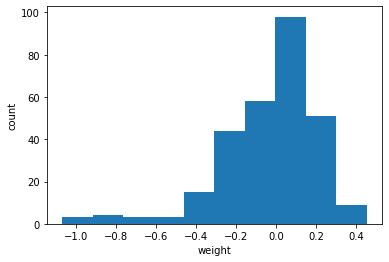

In [8]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

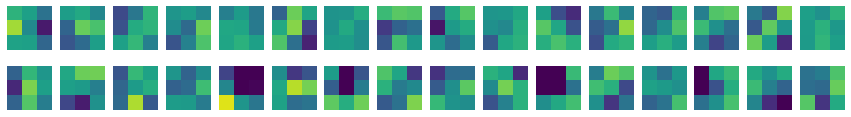

In [12]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')
plt.show()

In [14]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [15]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [16]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0016655097 0.07999127


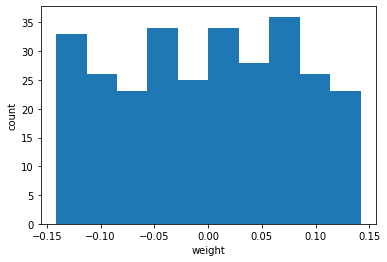

In [17]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

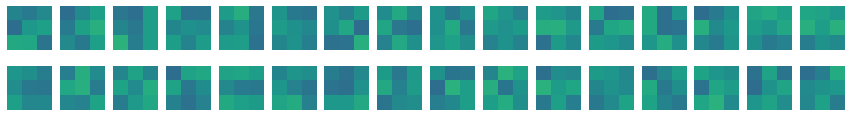

In [18]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')
plt.show()

# Keras.model
model을 이용해 각 층의 입력, 출력을 얻고 해당 층만을 보여주는 모델을 만들 수 있다.

In [19]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [20]:
conv_acti = keras.Model(model.input, model.layers[0].output)

#특성 맵 시각화